In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# ①-1 データの読み込み～価格の前処理を行い数値として使う、欠損のあるレコードを削除
df = pd.read_csv('Cars.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [ ]:
df.shape

(428, 15)

In [ ]:
df.info()
# 欠損データあり

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [ ]:
# MSRP,Invoiceを数値データに変換
df['MSRP'] = df['MSRP'].replace('[\$,]', '', regex=True).astype(float)
df['Invoice'] = df['Invoice'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197


In [ ]:
# 欠損値を含む行を削除
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    float64
 6   Invoice      426 non-null    float64
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 53.2+ KB


In [ ]:
# ①-2 予測モデルをつくる　「Invoice」および数値以外のデータ列を削除
df = df.drop(['Invoice', 'Make', 'Model', 'Type', 'Origin', 'DriveTrain'], axis=1)
df.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,36945.0,3.5,6.0,265,17,23,4451,106,189
1,23820.0,2.0,4.0,200,24,31,2778,101,172
2,26990.0,2.4,4.0,200,22,29,3230,105,183
3,33195.0,3.2,6.0,270,20,28,3575,108,186
4,43755.0,3.5,6.0,225,18,24,3880,115,197


In [ ]:
# 説明変数Xと目的変数yに分ける
X = df.drop(columns=['MSRP']).to_numpy()
y = df['MSRP'].to_numpy()

In [ ]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(298, 8) (128, 8) (298,) (128,)


In [ ]:
# 予測モデルの学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 予測モデルの評価
# 学習データの決定係数出力
model.score(X_train, y_train)

0.7777040932191988

In [ ]:
# テストデータの決定係数出力
model.score(X_test, y_test)
# 過学習の疑いあり？

0.6703808730651784

In [ ]:
model.predict(X_test)

array([51183.14984515, 15275.22767038, 34254.63066193, 46691.78931017,
       36989.65046747, 18647.05819114, 26867.79460976, 63051.23315588,
       48978.97151737, 35682.05040669, 29986.75753667, 20866.8224458 ,
       13079.02440281, 32262.5773298 , 35260.19252476, 32419.94109228,
       18664.20332892, 42982.58130591, 26577.9281084 , 90643.85308338,
       15064.95583056, 35265.91244757, 15060.26111621, 28873.64663583,
       33879.14363815, 44802.61486571, 40484.17460622, 18922.66087518,
       30862.30601983, 34076.67042306, 48756.43480181, 54102.41450811,
       21582.13246141, 22193.28836754, 57772.06167435, 12215.24637926,
       31483.47940772, 20775.93681324, 15438.27451875, 39832.29832292,
       17156.94765516, 19271.64009018, 50315.0013967 , 33298.46635147,
       38518.80098351, 33349.23566727, 46254.78127419, 10763.17903247,
       67962.93371271, 28392.02335671, 35176.47964776, 10274.6799151 ,
       49346.45070204, 16510.28638514, 13132.38491746, 22271.00418291,
      

In [ ]:
# 予測モデルを確認
print(model.coef_)
print(model.intercept_)

[-4753.21566325  3830.27868165   213.54536607   -76.26436877
   571.89968317     6.32743539  -493.54892764   -49.93372342]
5310.77129109536


<Axes: >

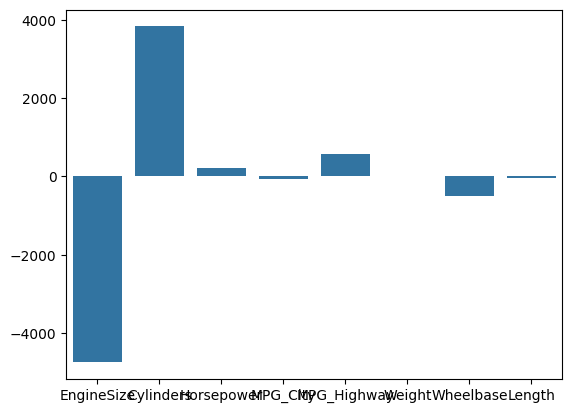

In [ ]:
# 影響度合いの可視化
sns.barplot(x = ['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'], y = model.coef_)

In [ ]:
# 標準化を活用しスケールを変換
# StandardScalerのインポート～インスタンス化、標準化の変換モデルの生成
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
# 標準化の変換モデルを利用して説明変数のスケールをそろえる
X_train_scaled = scaler.transform(X_train)

In [ ]:
# X_trainとX_train_scaledをDataFrame形式で状態を比較
df_X_train = pd.DataFrame(X_train, columns=['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'])
df_X_train.head()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,1.6,4.0,163.0,25.0,34.0,2678.0,97.0,144.0
1,3.0,6.0,155.0,19.0,26.0,3488.0,109.0,198.0
2,2.0,4.0,132.0,29.0,36.0,2581.0,105.0,174.0
3,4.6,8.0,302.0,17.0,23.0,4195.0,115.0,212.0
4,5.3,8.0,295.0,14.0,18.0,4947.0,130.0,219.0


In [ ]:
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'])
df_X_train_scaled.head()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,-1.402982,-1.141600,-0.720129,0.969375,1.283855,-1.156322,-1.276238,-2.809857
1,-0.188869,0.104542,-0.830640,-0.188436,-0.118854,-0.114089,0.099652,0.771626
2,-1.056093,-1.141600,-1.148359,1.741248,1.634532,-1.281132,-0.358978,-0.820144
3,1.198690,1.350684,1.199998,-0.574372,-0.644869,0.795612,0.787597,1.700158
4,1.805747,1.350684,1.103301,-1.153278,-1.521562,1.763215,2.507460,2.164424


In [ ]:
# X_train_scaledの各要素の平均値と標準偏差を確認し、問題なく標準化されているかチェック
df_X_train_scaled.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02
mean,-1.371014e-16,-1.192186e-16,-5.960929e-17,-1.907497e-16,2.443981e-16,-7.153115e-17,-4.828352e-16,-8.345301e-17
std,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00
min,-1.576427e+00,-1.141600e+00,-1.687099e+00,-1.925151e+00,-2.573593e+00,-1.983674e+00,-2.193498e+00,-2.876181e+00
25%,-7.092030e-01,-1.141600e+00,-7.408496e-01,-5.743724e-01,-6.448692e-01,-6.023945e-01,-5.882931e-01,-5.548494e-01
50%,-1.888686e-01,1.045421e-01,-1.054118e-01,-1.884356e-01,-1.188536e-01,-1.378935e-01,-1.296630e-01,-2.425936e-02
75%,6.783555e-01,1.045421e-01,5.818279e-01,1.975012e-01,4.071620e-01,5.115716e-01,4.436245e-01,5.063307e-01
max,4.407419e+00,3.842969e+00,3.935143e+00,7.530300e+00,4.264610e+00,4.649298e+00,4.112665e+00,3.424576e+00


In [ ]:
# 標準化の変換モデルを利用して説明変数のテストデータX_testを変換する
X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_testとX_test_scaledをDF形式で表示し変換前後の状態を確認
df_X_test = pd.DataFrame(X_test, columns=['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'])
df_X_test.head()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,5.0,8.0,302.0,16.0,24.0,4230.0,112.0,190.0
1,1.7,4.0,127.0,32.0,37.0,2601.0,103.0,175.0
2,3.8,6.0,240.0,18.0,28.0,3909.0,114.0,207.0
3,3.5,6.0,287.0,20.0,26.0,3188.0,104.0,169.0
4,3.0,6.0,220.0,17.0,26.0,3583.0,104.0,179.0


In [ ]:
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'])
df_X_test_scaled.head()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,1.545579,1.350684,1.199998,-0.767341,-0.469531,0.840647,0.443625,0.241036
1,-1.316260,-1.141600,-1.217428,2.320154,1.809870,-1.255398,-0.588293,-0.753821
2,0.504911,0.104542,0.343539,-0.381404,0.231823,0.427614,0.672940,1.368539
3,0.244743,0.104542,0.992790,0.004533,-0.118854,-0.500101,-0.473636,-1.151763
4,-0.188869,0.104542,0.067261,-0.574372,-0.118854,0.008148,-0.473636,-0.488526


In [ ]:
# 各要素の平均値と標準偏差を確認
df_X_test_scaled.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,-0.035072,-0.051226,0.034346,0.060313,0.103059,0.016300,0.012763,0.012011
std,0.847065,0.898334,0.980963,1.041042,1.024870,0.923266,0.840312,0.831716
min,-1.402982,-1.764671,-1.963377,-1.346246,-1.696900,-2.221715,-1.734868,-2.212943
25%,-0.795925,-1.141600,-0.623432,-0.574372,-0.469531,-0.593066,-0.588293,-0.505107
50%,-0.015424,0.104542,-0.022529,-0.188436,-0.118854,-0.016300,-0.129663,0.075226
75%,0.504911,0.104542,0.381527,0.390470,0.582500,0.522830,0.443625,0.506331
max,2.065914,1.350684,3.617425,7.723269,6.894688,3.078229,3.654035,2.496043


In [ ]:
# 予測モデルの学習
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# 予測モデルの評価
# scoreメソッドを利用し2パターンで実施
# 学習データで決定係数をチェック
model.score(X_train_scaled, y_train)

0.7777040932191988

In [ ]:
# テストデータで決定係数を確認
model.score(X_test_scaled, y_test)

0.6703808730651772

In [ ]:
model.predict(X_test_scaled)

array([51183.14984515, 15275.22767039, 34254.63066193, 46691.78931017,
       36989.65046747, 18647.05819114, 26867.79460975, 63051.23315588,
       48978.97151736, 35682.05040669, 29986.75753667, 20866.8224458 ,
       13079.02440281, 32262.5773298 , 35260.19252476, 32419.94109228,
       18664.20332892, 42982.5813059 , 26577.9281084 , 90643.85308338,
       15064.95583056, 35265.91244757, 15060.26111621, 28873.64663583,
       33879.14363815, 44802.61486571, 40484.17460622, 18922.66087518,
       30862.30601983, 34076.67042306, 48756.43480181, 54102.41450811,
       21582.13246142, 22193.28836754, 57772.06167435, 12215.24637927,
       31483.47940771, 20775.93681324, 15438.27451875, 39832.29832292,
       17156.94765516, 19271.64009018, 50315.0013967 , 33298.46635147,
       38518.80098351, 33349.23566727, 46254.78127419, 10763.17903247,
       67962.93371271, 28392.02335671, 35176.47964776, 10274.6799151 ,
       49346.45070204, 16510.28638515, 13132.38491746, 22271.00418291,
      

In [ ]:
# 予測する計算式を作成
print(model.coef_)
print(model.intercept_)

[-5480.95466025  6147.41824944 15458.77123422  -395.21688866
  3261.68851313  4917.54356063 -4304.54929897  -752.87844322]
31986.033557046976


<Axes: >

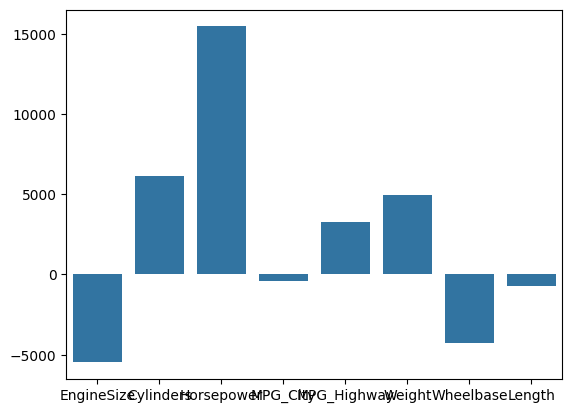

In [ ]:
# 各要素の重みをbarplot関数で可視化
sns.barplot(x = ['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'], y = model.coef_)

In [ ]:
# 多重共線性の対処
# 相関係数を確認　DataFrameのcorrメソッドで算出可能
df.drop(columns=['MSRP']).corr()
# EngineSizeとCylinders,MPG_CityとMPG_Highwayが高い

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


<Axes: xlabel='EngineSize', ylabel='Cylinders'>

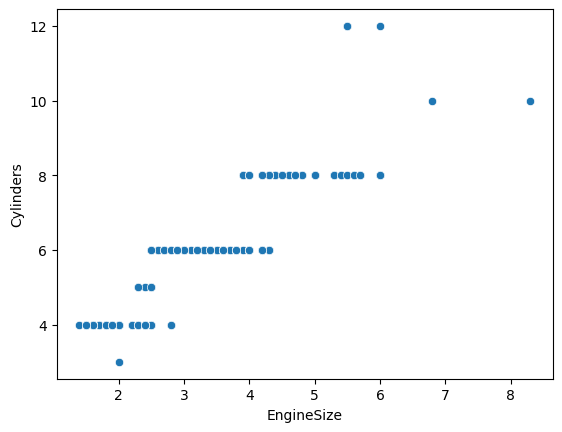

In [ ]:
# seabornのscatterplot関数で散布図を作成し相関の状態を確認
sns.scatterplot(x='EngineSize', y='Cylinders', data=df)
# EnginSizeのみを使用することとする

<Axes: xlabel='MPG_City', ylabel='MPG_Highway'>

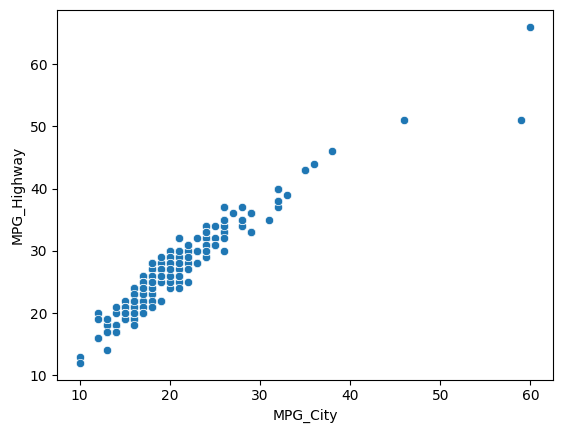

In [ ]:
sns.scatterplot(x='MPG_City', y='MPG_Highway', data=df)
# MPG_Cityのみを使用することとする

In [ ]:
# 説明変数Xと目的変数yを再定義する
X = df[['EngineSize', 'Horsepower', 'MPG_City', 'Weight', 'Wheelbase', 'Length']].to_numpy()
y = df['MSRP'].to_numpy()

In [ ]:
# 学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# スケール変換モデルを生成する
# SdandardScalerクラスをインスタンス化
scaler = StandardScaler()

In [ ]:
# X_trainを利用して標準化の変換ロジックをインプットさせる
scaler.fit(X_train)

StandardScaler()

In [ ]:
# このモデルを用いてX_trainとX_testをスケール変換する
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 予測モデルの学習
# LinearRegressionクラスを新たにインスタンス化
model = LinearRegression()

In [ ]:
# X_test_sdaledとy_trainで学習させる
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# 予測モデルの評価　scoreメソッドを利用して決定係数を出力
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))
#どの程度の乖離があれば過学習となるか？

0.755193624799056
0.6808436292775477


In [ ]:
# 予測
model.predict(X_test_scaled)

array([49961.48575001, 15658.44609492, 35002.68570537, 48814.55135352,
       34464.8762867 , 21556.0627999 , 25674.87258858, 63126.98650393,
       48068.94292637, 34578.61517925, 30315.45322017, 18649.47919716,
       13222.96814025, 29758.23694266, 34269.13781018, 31255.74648744,
       22111.91640074, 40740.6387929 , 25175.7650583 , 99116.88045843,
       15962.3107733 , 33576.83137363, 15254.63313627, 31346.23704845,
       30863.08335508, 41979.27313304, 45280.66656081, 21408.65304136,
       31325.13068273, 32996.3347156 , 43901.68316041, 53883.24084904,
       23374.77271883, 20034.11387027, 54361.58024008, 11795.67764592,
       32500.66056648, 19580.00694414, 16299.80870953, 37843.42121812,
       20151.38558936, 23617.92972795, 53267.19570536, 32012.14264834,
       36816.98499845, 32392.40772412, 43725.17268828, 11050.20959812,
       67453.86151307, 29121.84278404, 33748.25116892, 10271.10108253,
       50785.07200046, 18444.40760503, 14628.42598789, 21333.34968252,
      

In [ ]:
# 計算式の作成
print(model.coef_)
print(model.intercept_)

[-1819.27005496 17470.59473851  2308.99109692  4445.69440416
 -4919.01282651   163.10103267]
31986.03355704698


<Axes: >

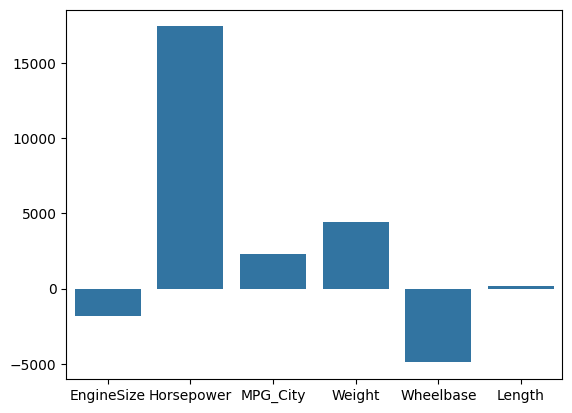

In [ ]:
# barplot関数で各要素の重みを可視化
sns.barplot(x = ['EngineSize', 'Horsepower', 'MPG_City', 'Weight', 'Wheelbase', 'Length'], y = model.coef_)

In [ ]:
#　考察
# Horsepowerが最もMSRPに影響を与えており、馬力が上がれば小売り価格も高くなる傾向がある
# 市街地燃費、車重が上がれば小売価格も上がる傾向があるが影響度は馬力程ではない
# ホイールベースが下がれば価格も下がる影響度がある
# エンジンサイズが小さくなれば価格が下がる傾向にあるがホイールベース程ではない
# 車両の長さは小売価格に対する影響度は小さい